# Lagaris Problem 5: 2nd-Order PDE BVP (Dirichlet BC)

## Setup

In [2]:
from math import exp, cos, sin
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The differential equation and analytical solution

The differential equation is provided in the form (equation (32) in Lagaris (1998)):

\begin{equation}
\nabla^2\psi = e^{-x}(x - 2 + y^3 + 6y)
\end{equation}

Rewritten in standard form:

\begin{equation}
G\left(\vec x, \psi, \vec \nabla \psi, \vec \nabla \vec \nabla \psi \right) =
\nabla^2 \psi - e^{-x}(x - 2 + y^3 + 6y) =
0
\end{equation}

The domain is $[[0,1],[0,1]]$. The boundary conditions are:

\begin{equation}
\psi(0,y) = y^3
\end{equation}

\begin{equation}
\psi(1,y) = (1 + y^3)e^{-1}
\end{equation}

\begin{equation}
\psi(x,0) = xe^{-x}
\end{equation}

\begin{equation}
\psi(1,y) = e^{-x}(x + 1)
\end{equation}

The analytical solution and its partial derivatives are:

\begin{equation}
\psi_a(x,y) = e^{-x}(x + y^3)
\end{equation}

\begin{equation}
\frac {\partial \psi_a}{\partial x} = -e^{-x}(x + y^3 - 1)
\end{equation}

\begin{equation}
\frac {\partial \psi_a}{\partial y} = 3e^{-x}y^2
\end{equation}

\begin{equation}
\frac {\partial^2 \psi_a}{\partial x^2} = e^{-x}(x + y^3 - 2)
\end{equation}

\begin{equation}
\frac {\partial^2 \psi_a}{\partial y^2} = 6e^{-x}y
\end{equation}

\begin{equation}
\frac {\partial^2 \psi_a}{\partial x \partial y} = -3e^{-x}y^2 = \frac {\partial^2 \psi_a}{\partial y \partial x}
\end{equation}

In [4]:
def Yaf(x, y):
    return exp(-x)*sin(x + y**3)

def dYa_dxf(x, y):
    return exp(-x)*(x + y**3 - 1)

def dYa_dyf(x, y):
    return 3*exp(-x)*y**2

def d2Ya_dx2f(x, y):
    return exp(-x)*(x + y**3 - 2)

def d2Ya_dy2f(x, y):
    return 6*exp(-x)*y

def d2Ya_dxdyf(x, y):
    return -3*exp(-x)*y**2

def d2Ya_dydxf(x, y):
    return d2Ya_dxdyf(x, y)

In [5]:
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
x,y = np.meshgrid(x,y)
Ya = np.zeros((n,n))
dYa_dx = np.zeros((n,n))
dYa_dy = np.zeros((n,n))
d2Ya_dx2 = np.zeros((n,n))
d2Ya_dy2 = np.zeros((n,n))
d2Ya_dxdy = np.zeros((n,n))
d2Ya_dydx = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        Ya[i,j] = Yaf(x[i,j],y[i,j])
        dYa_dx[i,j] = dYa_dxf(x[i,j],y[i,j])
        dYa_dy[i,j] = dYa_dyf(x[i,j],y[i,j])
        d2Ya_dx2[i,j] = d2Ya_dx2f(x[i,j],y[i,j])
        d2Ya_dy2[i,j] = d2Ya_dy2f(x[i,j],y[i,j])
        d2Ya_dxdy[i,j] = d2Ya_dxdyf(x[i,j],y[i,j])
        d2Ya_dydx[i,j] = d2Ya_dydxf(x[i,j],y[i,j])

/Users/ewinter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


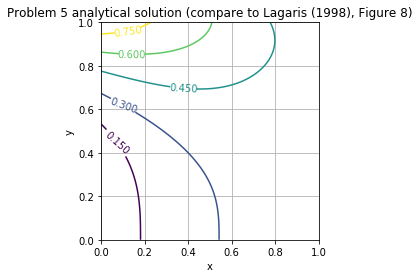

In [14]:
# Analytical solution
cplot = plt.contour(x,y,Ya)
plt.clabel(cplot, inline=1, fontsize=10)
plt.grid()
plt.xlabel('x')
plt.xlim(0,1)
plt.ylabel('y')
plt.ylim(0,1)
plt.axes().set_aspect('equal');
plt.title("Problem 5 analytical solution (compare to Lagaris (1998), Figure 8)");

/Users/ewinter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


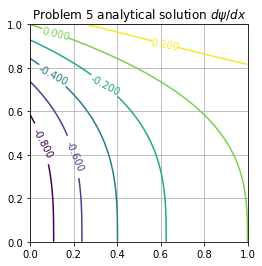

In [7]:
# dY/dx
cplot = plt.contour(x,y,dYa_dx)
plt.clabel(cplot, inline=1, fontsize=10)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.axes().set_aspect('equal');
plt.title("Problem 5 analytical solution $d\psi/dx$");

/Users/ewinter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


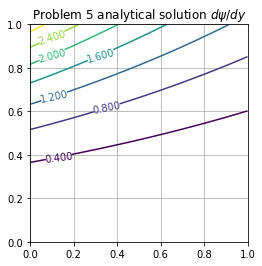

In [8]:
# dY/dy
cplot = plt.contour(x,y,dYa_dy)
plt.clabel(cplot, inline=1, fontsize=10)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.axes().set_aspect('equal');
plt.title("Problem 5 analytical solution $d\psi/dy$");

/Users/ewinter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


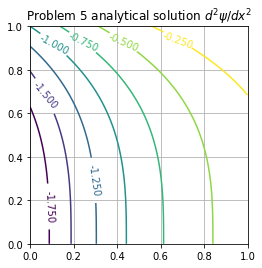

In [9]:
# d2Y/dx2
cplot = plt.contour(x,y,d2Ya_dx2)
plt.clabel(cplot, inline=1, fontsize=10)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.axes().set_aspect('equal');
plt.title("Problem 5 analytical solution $d^2\psi/dx^2$");

/Users/ewinter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


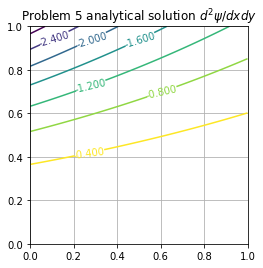

In [11]:
# d2Y/dxdy
cplot = plt.contour(x,y,d2Ya_dxdy)
plt.clabel(cplot, inline=1, fontsize=10)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.axes().set_aspect('equal');
plt.title("Problem 5 analytical solution $d^2\psi/dxdy$");

/Users/ewinter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


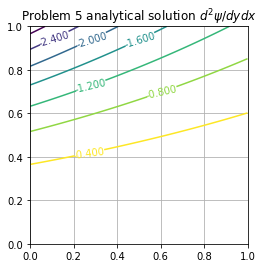

In [12]:
# d2Y/dydx
cplot = plt.contour(x,y,d2Ya_dydx)
plt.clabel(cplot, inline=1, fontsize=10)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.axes().set_aspect('equal');
plt.title("Problem 5 analytical solution $d^2\psi/dydx$");

/Users/ewinter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


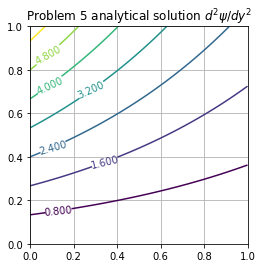

In [15]:
# d2Y/dy2
cplot = plt.contour(x,y,d2Ya_dy2)
plt.clabel(cplot, inline=1, fontsize=10)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.axes().set_aspect('equal');
plt.title("Problem 5 analytical solution $d^2\psi/dy^2$");